In [16]:
pip install sklearn 

Note: you may need to restart the kernel to use updated packages.


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

In [98]:
df = pd.read_csv('Titanic_Disaster.csv')

In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
data = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
data = df.apply(lambda col: pd.factorize(col, sort=True)[0])

data.shape

(891, 12)

In [101]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,28,1,0,523,18,-1,2
1,1,1,0,190,0,51,1,0,596,207,81,0
2,2,1,2,353,0,34,0,0,669,41,-1,2
3,3,1,0,272,0,47,1,0,49,189,55,2
4,4,0,2,15,1,47,0,0,472,43,-1,2


In [102]:
data = data.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

In [103]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2,1,28,1,0,18,-1,2
1,1,0,0,51,1,0,207,81,0
2,1,2,0,34,0,0,41,-1,2
3,1,0,0,47,1,0,189,55,2
4,0,2,1,47,0,0,43,-1,2


In [104]:
data.shape

(891, 9)

In [105]:
data.dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
Fare        int64
Cabin       int64
Embarked    int64
dtype: object

In [106]:
print(data['Embarked'].unique())

[ 2  0  1 -1]


/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


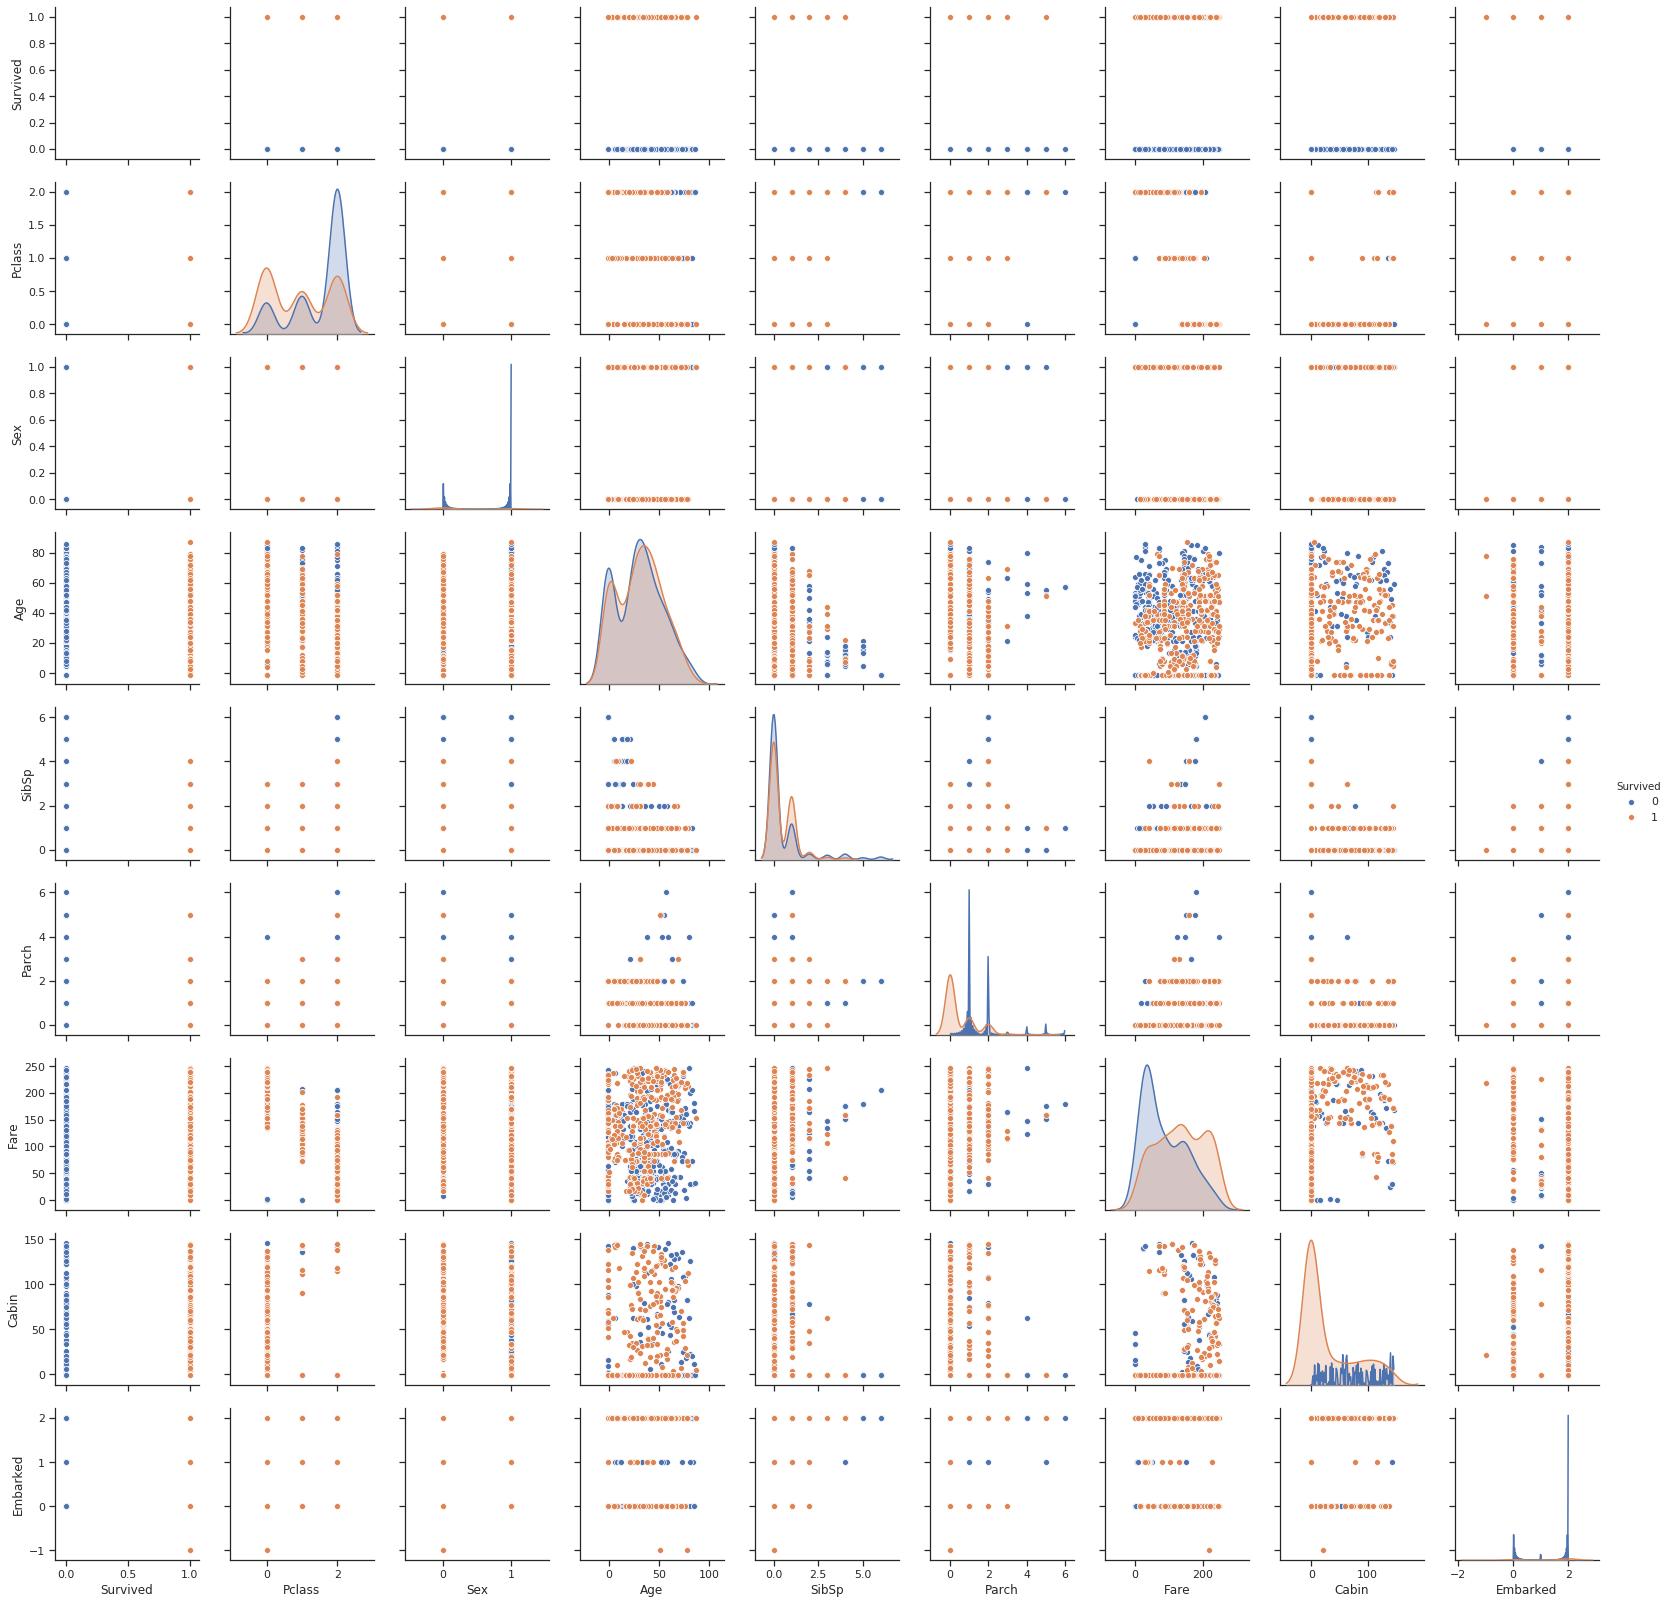

In [107]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

all_feature = sns.pairplot(data, hue="Survived")

In [108]:
X = data.drop(['Survived'], axis=1)

In [109]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,2,1,28,1,0,18,-1,2
1,0,0,51,1,0,207,81,0
2,2,0,34,0,0,41,-1,2
3,0,0,47,1,0,189,55,2
4,2,1,47,0,0,43,-1,2


In [110]:
y = data['Survived']

In [111]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [113]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with training data
logreg.fit(X_train,y_train)

#Make prediction using testing set
y_pred=logreg.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Evaluation using Confusion Matrix

In [114]:
#Import metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[118,  21],
       [ 21,  63]])

Visuallize the confusion matrix to QC the mode

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
Here, you will visualize the confusion matrix using Heatmap.

Text(0.5, 257.44, 'Predicted label')

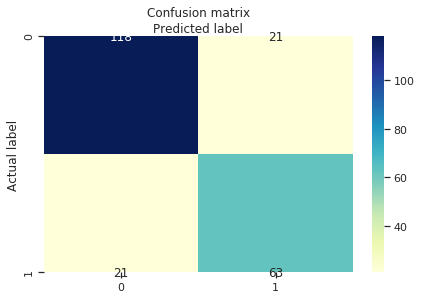

In [115]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Confusion Matrix Evaluation Metrics

In [116]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8116591928251121
Precision: 0.75
Recall: 0.75


We got a classification rate of 81%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. 

In this prediction case, when the Logistic Regression model predicted the survivor status, it has correct 75% of the time.

Recall: If there are people who survived in the test set and the Logistic Regression model can identify it 75% of the time.